<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_001_Image_Processing_some_concepts_before_first_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
import zipfile
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='trash.zip'
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_gray.append(cv2.imread(name, 0))
        x_original.append(cv2.imread(name))
        #x.append(cv2.resize(cv2.imread(name),(64,64)))

In [5]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [7]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [8]:
x_gray[0].shape

(384, 512)

In [9]:
x_original[0].shape

(384, 512, 3)

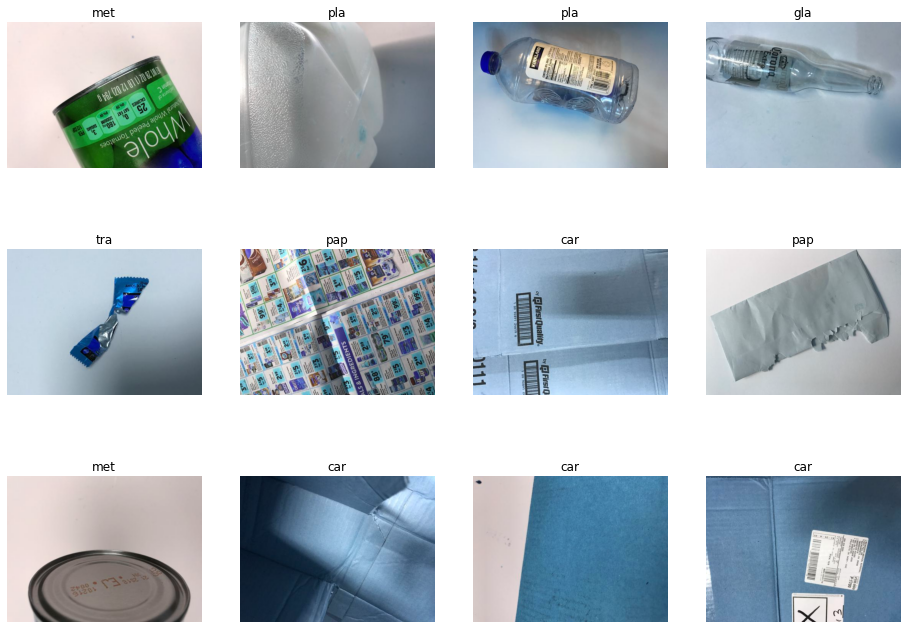

In [10]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_original[kk])
  plt.title(y_names[kk])
  plt.axis("off")

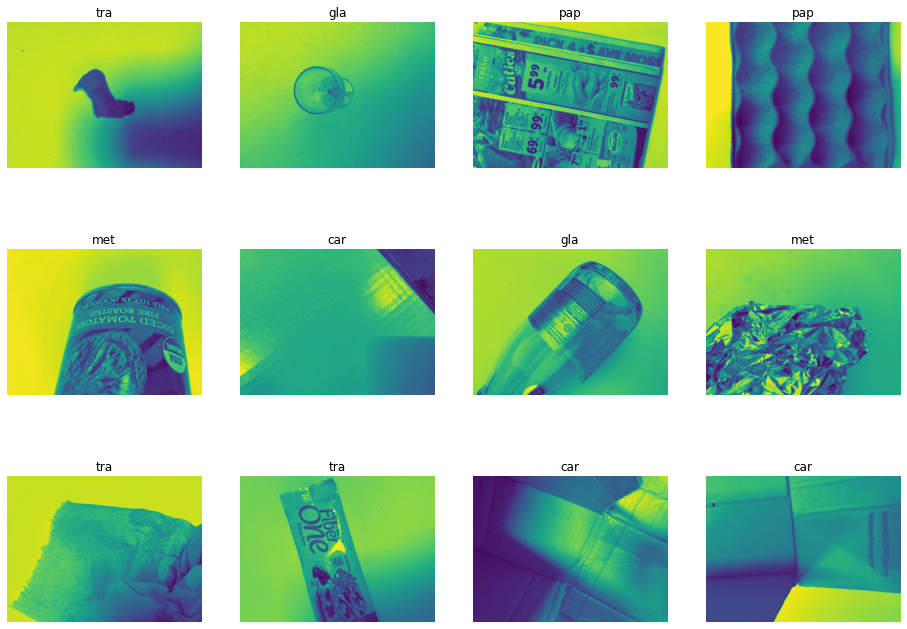

In [11]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

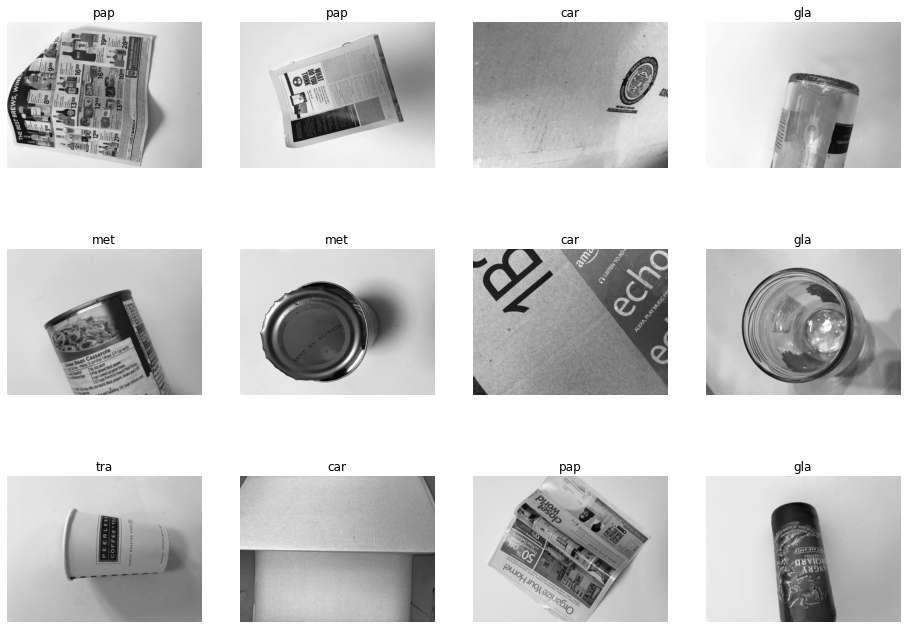

In [12]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [14]:
x_gray[0]

array([[208, 208, 209, ..., 180, 182, 183],
       [209, 210, 211, ..., 181, 182, 182],
       [211, 212, 212, ..., 182, 181, 181],
       ...,
       [155, 156, 158, ...,  95,  95,  95],
       [155, 155, 155, ...,  94,  95,  95],
       [157, 155, 153, ...,  94,  95,  95]], dtype=uint8)

In [15]:
x_gray[0].ravel()

array([208, 208, 209, ...,  94,  95,  95], dtype=uint8)

In [16]:
len(x_gray[0].ravel()) # Excel 1,048,576 rows by 16,384 columns

196608

In [20]:
# all images are load in variable x...
FILE='trash.zip'
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 0),(80,60)))

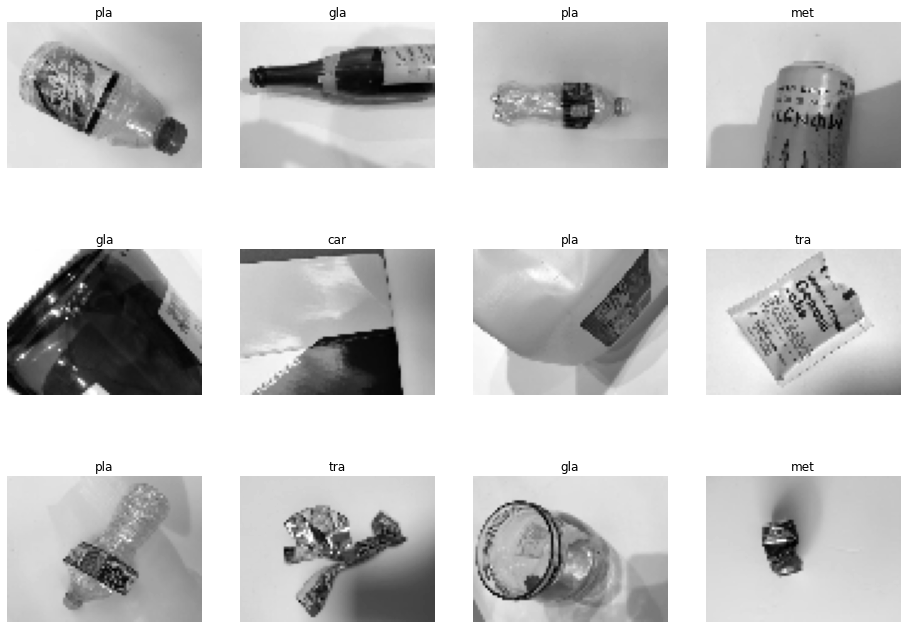

In [21]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")